# Test des modèles sur des images de Google Street

## Introduction

Ce notebook contient un bout de code permettant d'evaluer nos différents modèles entrainés sur des images tirés automatiquement de Google Street, afin de vérifier si ls modèles ont très bien généralisé leur apprentissage.

## Importation des modèles

In [1]:
import sys
import os


def check_path_exists(Path,Message):
    if not os.path.exists(Path):
        print(Message)
        sys.exit(1)
# Cette partie permet d'ajouter le dossier parent au path, pour pouvoir importer les modules que nous avons créés. ça peut être soit un chemin
# absolu, soit un chemin relatif. Ici, c'est un chemin absolu (à changer pour votre cas)
Path_Modules = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Modules"
Path_Models = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Models"
check_path_exists(Path_Modules,"Le chemin spécifié pour importer les modules n'existe pas. Il faut surement le modifier.")


sys.path.append(Path_Modules)
sys.path.append(Path_Models)

# Importer les module
from Preprocessing import *
from Resnet import *
from Test import *


## Importation des images

In [2]:

folder_test_images_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Donnees_Test"

# Checker si le dossier existe
check_path_exists(folder_test_images_path,"Le chemin spécifié pour les images n'existe pas. Il faut surement le modifier.")


# Renommer les images
RENAME = True

if RENAME : 
    rename_images_in_folder(folder_test_images_path)

Renommé : 0BVb4QMDnxfZet3j.png -> img_1.png
Renommé : 0nEm78cr1fIi8.png -> img_2.png
Renommé : 0vaw6ynE08P.png -> img_3.png
Renommé : 1PfUZzj6rMq.png -> img_4.png
Renommé : 1uaToIK3dGnz.png -> img_5.png
Renommé : 3akhYVC6FgdMbtY.png -> img_6.png
Renommé : 3bNUPXFSvVua1qsgHZ.png -> img_7.png
Renommé : 3n6LfR69DKjIy18kB.png -> img_8.png
Renommé : 7EWSRtChOA5ErBjSA.png -> img_9.png
Renommé : 8RZzVkQtQ3f.png -> img_10.png
Renommé : 9FUbE9QxhvYGklPqCT.png -> img_11.png
Renommé : 9pZvUB4hwQJQStFz.png -> img_12.png
Renommé : 30bhfbMfXrdh7j.png -> img_13.png
Renommé : 6575xqxUHPjO83mq8.png -> img_14.png
Renommé : AcGJwEF5Ng.png -> img_15.png
Renommé : Ajb5B3alRb.png -> img_16.png
Renommé : BHXzFBfDqrv.png -> img_17.png
Renommé : BLFKa6SWOG0xcTf.png -> img_18.png
Renommé : BRiTCIPsmi4.png -> img_19.png
Renommé : BZhuCjB6vmdMZ3YmC.png -> img_20.png
Renommé : BnHtjXQEARY2yY2Z.png -> img_21.png
Renommé : C3JuP6Rg9salJ.png -> img_22.png
Renommé : DrEThBYiZpkx.png -> img_23.png
Renommé : E6HGUORAtf.

In [3]:
resize=True
size=(224,224)
normalize=True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Images_Original,Images = import_images_nparrays_test(folder_test_images_path, resize=True, size=(224,224), normalize=True)

Images = torch.tensor(Images, dtype=torch.float32)

Images = Images.to(device)






/tmp/ipykernel_45191/2836749281.py:10: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  Images = torch.tensor(Images, dtype=torch.float32)


## Affichage des images pour visualisation

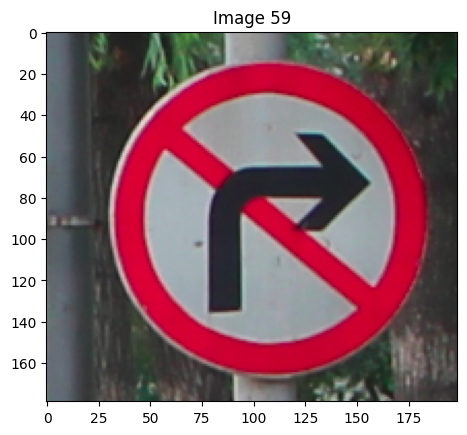

In [4]:
# Afficher les images


import matplotlib.pyplot as plt
import numpy as np
# Plot the first image
nb = np.random.randint(0,Images.shape[0],1)[0]
Image_To_Plot = Images_Original[nb]

Image_To_Plot= np.transpose(Image_To_Plot, (0, 1, 2))
plt.imshow(Image_To_Plot)
plt.title(f"Image {nb}")
plt.show()

## Importation des modèles

Ici on définit un dictionnaire qui va contenir les paths des différents modèles de prédictions

In [5]:


model_type_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Types.pth"

model_Dangers_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Dangers.pth"

model_Fin_Interdictions_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Fin_Interdictions.pth"

model_Obligations_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Obligations.pth"

model_Indications_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Indications.pth"

model_Interdictions_path = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Saved_Models/Model_Interdictions.pth"


# Gather models in Dict

models_paths = {
    "Types": model_type_path,
    "Dangers": model_Dangers_path,
    "Fin_Interdictions": model_Fin_Interdictions_path,
    "Obligations": model_Obligations_path,
    "Indications": model_Indications_path,
    "Interdictions": model_Interdictions_path
}


On définit ici le path des différents dictionnaires d'encodages.

In [6]:
dict_paths = "/home/ayoubchoukri/Etudes/5A/Stats_Grande_Dimension/Projets/Projet/Projet_HDDL_2/Commun/Commun_Ayoub/Encoding_Dictionaries/"


## Test sur les images de street view

Type pannel: Indications - Label: Indications-Passage_Pour_Pietons


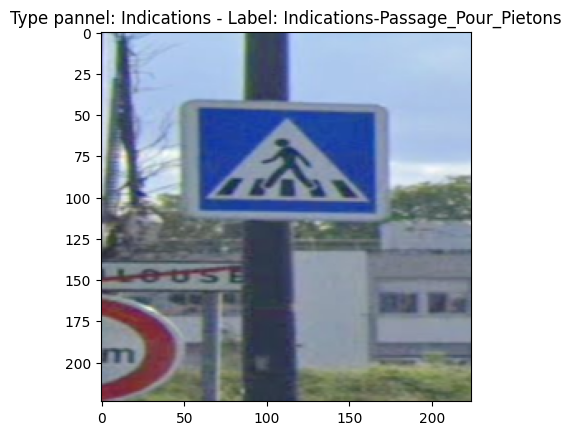

Type pannel: Indications - Label: Indications-Reduction_Du_Nombre_De_Voies


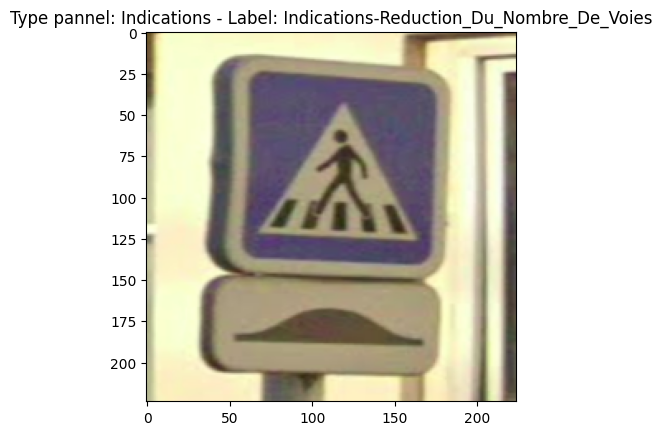

Type pannel: Interdictions - Label: Interdictions-interdiction_tourner_droite


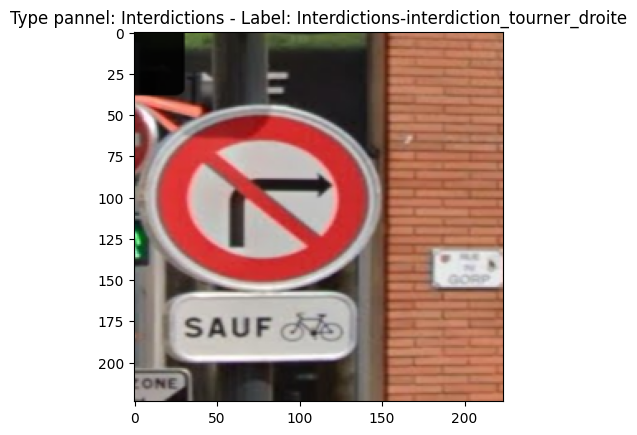

Type pannel: Interdictions - Label: Interdictions-interdiction_tourner_droite


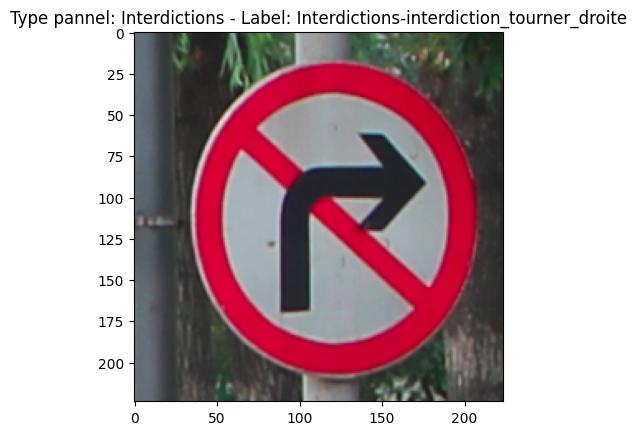

Type pannel: Interdictions - Label: Interdictions-limitation_vitesse


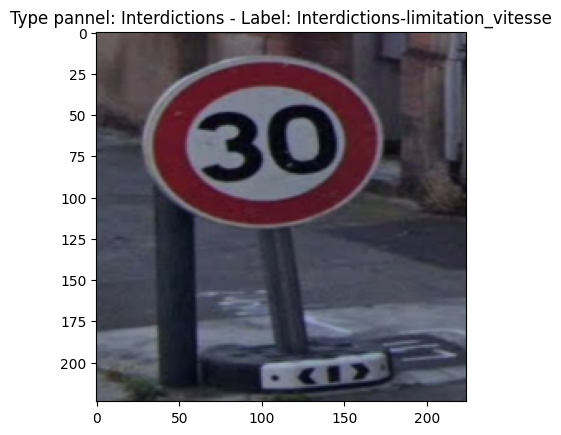

Type pannel: Obligations - Label: Obligations-tout_droit_ou_a_droite


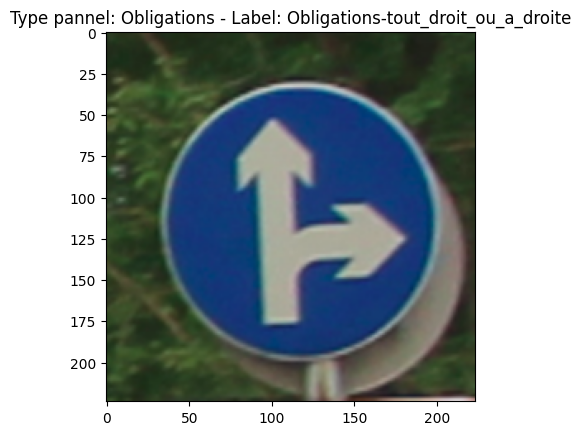

Type pannel: Interdictions - Label: Interdictions-limitation_vitesse


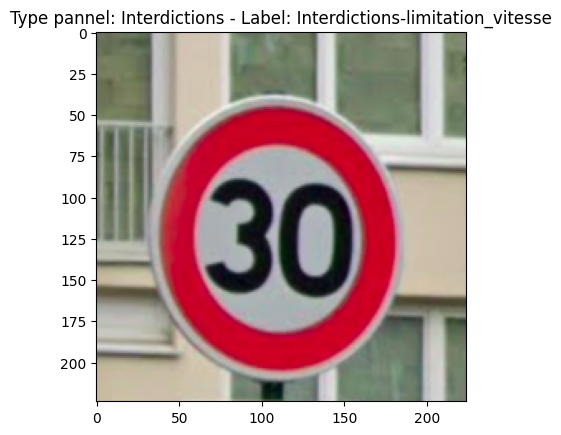

Type pannel: Obligations - Label: Obligations-tourner_a_droite


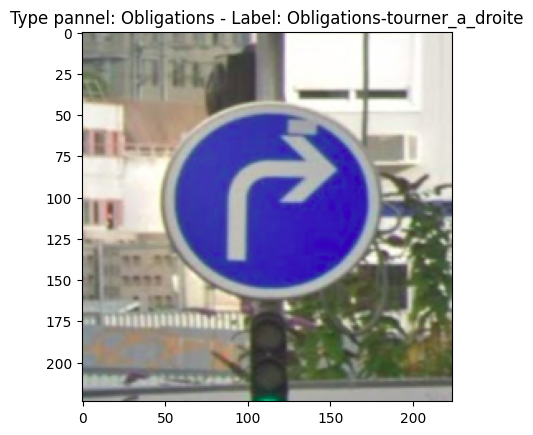

Type pannel: Interdictions - Label: Interdictions-signaux_sonores_interdits


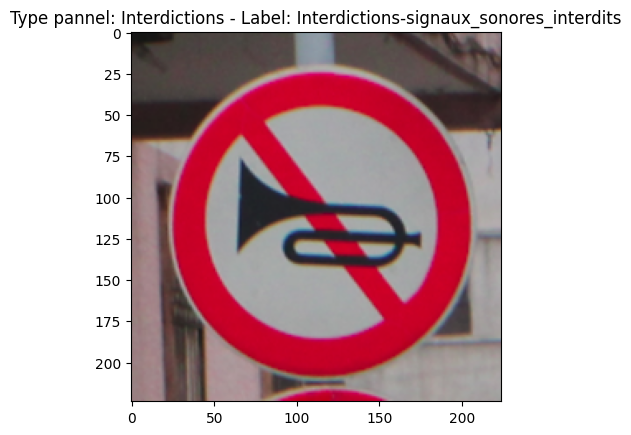

Type pannel: Interdictions - Label: Interdictions-interdiction_tourner_gauche


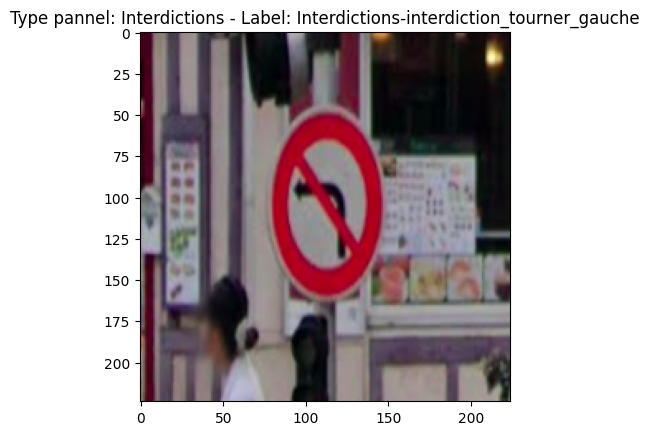

In [7]:
Nb_Images_To_Test = 10
test_images(Nb_Images_To_Test,Images,models_paths,dict_paths)

## Analyse de la robustesse de nos modèles

Afin d'analyser la robustesse de nos modèles, on va essayer d'appliquer des transformations basiques sur nos images et voir si la prédiction va changer ou pas, permettant ainsi de voir si nos modèles sont robustes ou pas.

### Définitions des transformations qu'on va appliquer

In [9]:
torch.cuda.empty_cache()

In [12]:
import torch
from torchvision.transforms.v2 import *
from torchvision import transforms, utils

In [149]:
List_Transforms = [
        RandomHorizontalFlip(0),
        RandomVerticalFlip(0.7),
        RandomRotation(25),
        # RandomPerspective(),
        ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
        RandomAffine(degrees=10),
        GaussianBlur(5),
        transforms.Lambda(lambda img: img + torch.randn_like(img)*0.05),
    ] 
    
Transforms = Compose([
        RandomApply(List_Transforms, p=1),
        ToTensor()
    ])

/home/ayoubchoukri/anaconda3/envs/Personal/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [150]:
def Transform_Image(Image,Transforms):
    Image_To_Transform =  torch.tensor(torch.permute(Image,(2, 0, 1)))

    Image_Transformed = Transforms(Image_To_Transform)


    return Image, Image_Transformed


def Plot_Image_And_Image_Transformed(Image,Image_Transformed,title_left="Image Original",title_right="Image Transformée"):

    fig,axes = plt.subplots(1,2,figsize=(20,6))

    axes[0].imshow(Image.cpu().numpy())

    axes[0].set_title(title_left)



    Image_Transformed = torch.permute(Image_Transformed,(1,2,0))
    axes[1].imshow(Image_Transformed.cpu().numpy())

    axes[1].set_title(title_right)


    plt.show()
    



/tmp/ipykernel_45191/3275376796.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Image_To_Transform =  torch.tensor(torch.permute(Image,(2, 0, 1)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18354124..1.0469198].


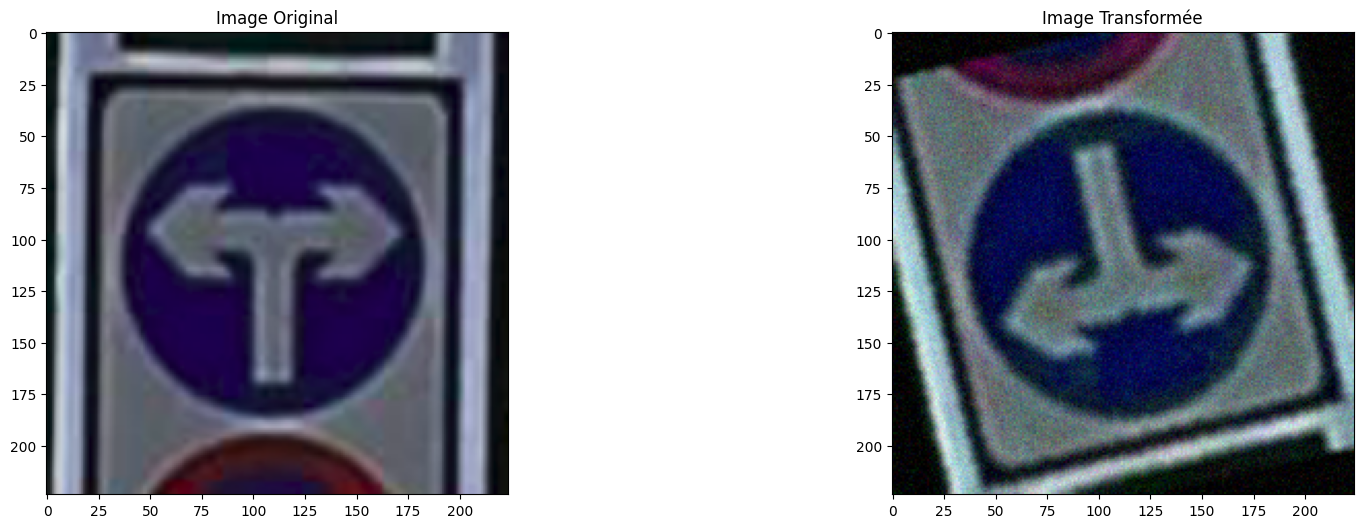

In [151]:
# Plot the first image
nb = np.random.randint(0,Images.shape[0],1)[0]
Image = Images[nb]


Image , Image_Transformed = Transform_Image(Image,Transforms)

Plot_Image_And_Image_Transformed(Image,Image_Transformed)


In [152]:

def test_images_transformed(nbimages,images,folder_models_path,dict_paths,transforms):

    for i in range(nbimages):

        Image = random.choice(images)


        type_pannel,label = test_image(Image,folder_models_path,dict_paths)

        Image,Image_Transformed = Transform_Image(Image,Transforms)
        # Image = torch.tensor(Image).to(device=device)
        # Image_Transformed = torch.tensor(Image_Transformed).to(device=device)

        Image_Transformed=Image_Transformed.permute(1,2,0)
        type_pannel_transformed,label_transformed = test_image(Image_Transformed,folder_models_path,dict_paths)
        Image_Transformed=Image_Transformed.permute(2,0,1)
        Title_Left= f'Type pannel: {type_pannel} - Label: {label}'
        Title_Right = f'Type pannel: {type_pannel_transformed} - Label: {label_transformed}'
        Plot_Image_And_Image_Transformed(Image,Image_Transformed,title_left=Title_Left,title_right=Title_Right)

    return None



Type pannel: Interdictions - Label: Interdictions-interdiction_faire_demi_tour


/tmp/ipykernel_45191/3275376796.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Image_To_Transform =  torch.tensor(torch.permute(Image,(2, 0, 1)))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.21415609..0.8983831].


Type pannel: Interdictions - Label: Interdictions-interdiction_faire_demi_tour


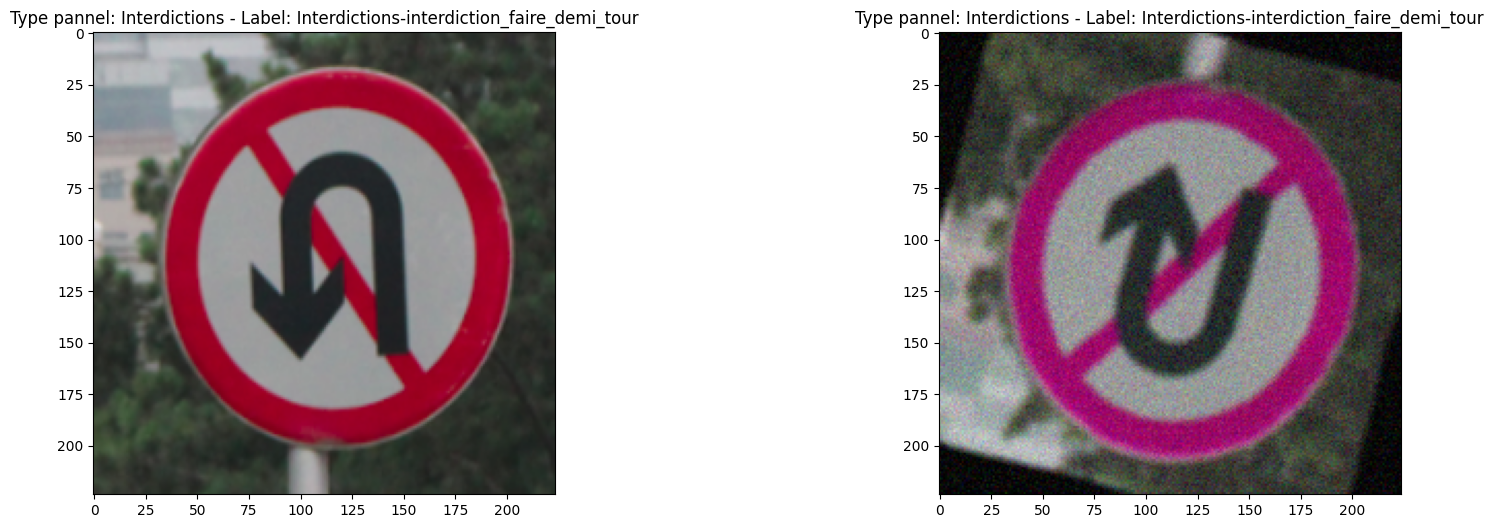

In [166]:
test_images_transformed(1,Images,models_paths,dict_paths,transforms=Transforms)